# Survival Analysis
Used to know the expected time when one or more event will occur (e.g. death, remission, relapse, recurrence, etc).
<br> It models time to event data.
<br>

When describing the survival times of group members, we use:
* Life tables
* Kaplan-Meier curves
* Survival function
* Hazard function
<br>

When comparing the survival times of 2 or more groups, we use:
* Log-rank test
<br>

When describing the effect of categorical or quantitative variables on survival, we use:
* Cox proportional hazards regression
* Parametric survival models
* Survival trees
* Survival random forests




### What is survival time?
It is the amount of time until a subject/patient is alive.
### What is an event?
It could be anything that is the interest of the research study (e.g. death, disease occurence, disease recurrence, recovery, etc).
### What is censoring?
It occurs when a subject/patient did not have an event during the observation time. It is either nothing is observed or known about the subject/patient.
<br> Types of censoring:
* Right censoring (death of the subject/patient)
* Left censoring (event can't be observed for some reason)
* Interval censoring (available data on some intervals only)

## Import and install the necessary libraries
(The installation will only be valid during your session in Google Colab. Once you close the tab/window or when you logged out of your account, the installation will automaticall be removed. You will have to re-run the installation on every session/access that you do.)

In [1]:
#Install the library
!pip install lifelines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.statistics import logrank_test

## Import the dataset

In [3]:
pbc = pd.read_csv('primary biliary cirrhosis RCT.csv')
pbc.head()

,PatientID,Days,Status,Treatment,Age,Sex,Ascites,Hepatomegaly,SpiderAngiomata,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglyceride,Platelet,Protime,HistologyStage
0,1,400,0,penicillamine,58.77,f,yes,yes,yes,present,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,2,penicillamine,56.45,f,no,yes,yes,absent,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,penicillamine,70.07,m,no,no,no,diurese,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,penicillamine,54.74,f,no,yes,yes,diurese,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,placebo,38.11,f,no,yes,yes,absent,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
# How many patients are enrolled in the study?

pbc['PatientID'].count()

418

In [5]:
# What is the average survival time of the patient with primary biliary cirrhosis?

pbc['Days'].mean()

1917.7822966507176

## Kaplan-Meier curve

In [6]:
# Assign Kaplan-Meier fitter function as an object

kmf = KaplanMeierFitter()

In [7]:
# We fit our dataset

kmf.fit(durations = pbc['Days'], event_observed=pbc['Status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 418 total observations, 161 right-censored observations>

In [8]:
# Create the event table

kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,418,418
41.0,2,0,2,0,418
43.0,1,0,1,0,416
51.0,1,0,1,0,415
71.0,1,0,1,0,414
...,...,...,...,...,...
4500.0,1,1,0,0,5
4509.0,1,1,0,0,4
4523.0,1,1,0,0,3


In [9]:
# What is the probability of survival in 5 years?

kmf.predict(1825)

0.670553459328332

In [10]:
# What is the probability of survival in 10 years?

kmf.predict(3650)

0.18946959952425133

In [11]:
# Get the survival probability for the whole timeline

kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
41.0,1.000000
43.0,1.000000
51.0,1.000000
71.0,1.000000
...,...
4500.0,0.027093
4509.0,0.020320
4523.0,0.013547


In [12]:
# Determine the confidence interval

kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
41.0,1.000000,1.000000
43.0,1.000000,1.000000
51.0,1.000000,1.000000
71.0,1.000000,1.000000
...,...,...
4500.0,0.009294,0.061837
4509.0,0.005742,0.052765
4523.0,0.002752,0.043340
4556.0,0.000634,0.033778


In [13]:
# How many years will it take when there is 50% of the patients that died?

(kmf.median_survival_time_)/365

6.47945205479452

## Plot the Kaplan-Meier curve

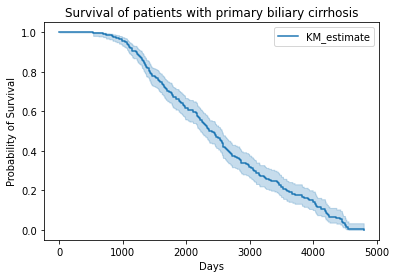

In [14]:
kmf.plot()

plt.title('Survival of patients with primary biliary cirrhosis')
plt.ylabel('Probability of Survival')
plt.xlabel('Days')
plt.show()

## Cumulative density function

In [15]:
# What is the probability of death on all time interval?

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
41.0,0.000000
43.0,0.000000
51.0,0.000000
71.0,0.000000
...,...
4500.0,0.972907
4509.0,0.979680
4523.0,0.986453


## Plot the cumulative density

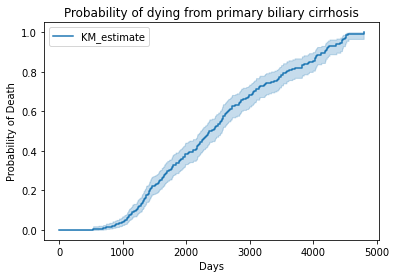

In [16]:
kmf.plot_cumulative_density()

plt.title('Probability of dying from primary biliary cirrhosis')
plt.ylabel('Probability of Death')
plt.xlabel('Days')
plt.show()

## Hazard function (Nelson-Aalen curve)

In [17]:
# Assign the Nelson-Aalen fitter as an object

naf = NelsonAalenFitter()

# Fit the dataset

naf.fit(pbc['Days'], event_observed = pbc['Status'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 418 total observations, 161 right-censored observations>

In [18]:
# What is the risk of dying from primary biliary cirrhosis?

naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
41.0,0.000000
43.0,0.000000
51.0,0.000000
71.0,0.000000
...,...
4500.0,3.499260
4509.0,3.749260
4523.0,4.082594


In [19]:
# What is the risk of dying from primary biliary cirrhosis in 5 years?

naf.predict(1825)

0.39887719046584724

In [20]:
# What is the risk of dying from primary biliary cirrhosis in 10 years?

naf.predict(3650)

1.6544612523890345

## Plot the Nelson-Aalen curve

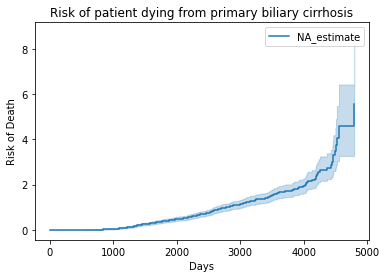

In [21]:
naf.plot_cumulative_hazard()

plt.title('Risk of patient dying from primary biliary cirrhosis')
plt.ylabel('Risk of Death')
plt.xlabel('Days')
plt.show()

## Kaplan-Meier on different groups

In [22]:
# Create separate object for each sex

kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

In [23]:
# Create a subset for each sex

male = pbc.loc[pbc['Sex'] == 'm']
female = pbc.loc[pbc['Sex'] == 'f']

In [24]:
# Fit the subset and put a correct label for each subset

kmf_male.fit(durations = male['Days'], event_observed = male['Status'], label='Male')
kmf_female.fit(durations = female['Days'], event_observed = female['Status'], label='Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 374 total observations, 137 right-censored observations>

In [25]:
# Show the event table for male

kmf_male.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,44,44
140.0,1,0,1,0,44
191.0,1,0,1,0,43
533.0,1,1,0,0,42
552.0,1,0,1,0,41
611.0,1,0,1,0,40
762.0,1,0,1,0,39
799.0,1,0,1,0,38
877.0,1,1,0,0,37


In [26]:
# Show the event table for female

kmf_female.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,374,374
41.0,2,0,2,0,374
43.0,1,0,1,0,372
51.0,1,0,1,0,371
71.0,1,0,1,0,370
...,...,...,...,...,...
4500.0,1,1,0,0,5
4509.0,1,1,0,0,4
4523.0,1,1,0,0,3


In [27]:
# Predict the survival probability of male after 5 years

kmf_male.predict(1825)

0.6720816037459357

In [28]:
# Predict the survival probability of female after 5 years

kmf_female.predict(1825)

0.6703226376698953

In [29]:
# What is the survival probability for all the timeline for male?

kmf_male.survival_function_

,Male
timeline,
0.0,1.000000
140.0,1.000000
191.0,1.000000
533.0,0.976190
552.0,0.976190
611.0,0.976190
762.0,0.976190
799.0,0.976190
877.0,0.949807


In [30]:
# What is the survival probability for all the timeline for female?

kmf_female.survival_function_

,Female
timeline,
0.0,1.000000
41.0,1.000000
43.0,1.000000
51.0,1.000000
71.0,1.000000
...,...
4500.0,0.026887
4509.0,0.020166
4523.0,0.013444


## Plot the survival function comparing male and female

Text(0.5, 0, 'Days')

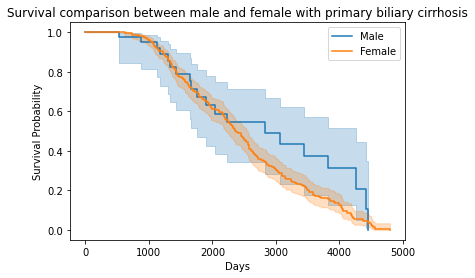

In [31]:
kmf_male.plot()
kmf_female.plot()

plt.title('Survival comparison between male and female with primary biliary cirrhosis')
plt.ylabel('Survival Probability')
plt.xlabel('Days')

In [32]:
# What is the probability of male dying at a certain time?

kmf_male.cumulative_density_

,Male
timeline,
0.0,0.000000
140.0,0.000000
191.0,0.000000
533.0,0.023810
552.0,0.023810
611.0,0.023810
762.0,0.023810
799.0,0.023810
877.0,0.050193


In [33]:
# What is the probability of female dying at a certain time?

kmf_female.cumulative_density_

,Female
timeline,
0.0,0.000000
41.0,0.000000
43.0,0.000000
51.0,0.000000
71.0,0.000000
...,...
4500.0,0.973113
4509.0,0.979834
4523.0,0.986556


## Plot the cumulative density

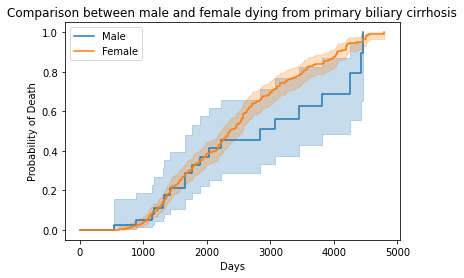

In [34]:
kmf_male.plot_cumulative_density()
kmf_female.plot_cumulative_density()

plt.title('Comparison between male and female dying from primary biliary cirrhosis')
plt.ylabel('Probability of Death')
plt.xlabel('Days')
plt.show()

## Hazard function (between 2 groups)
Nelson-Aalen curve

In [35]:
# Create a separate object for each sex

naf_male = NelsonAalenFitter()
naf_female = NelsonAalenFitter()

# Fit the dataset

naf_male.fit(male['Days'], event_observed = male['Status'], label = 'Male')
naf_female.fit(female['Days'], event_observed = female['Status'], label = 'Female')

<lifelines.NelsonAalenFitter:"Female", fitted with 374 total observations, 137 right-censored observations>

In [36]:
# What is the risk of dying from primary biliary cirrhosis in male in each timeline?

naf_male.cumulative_hazard_

,Male
timeline,
0.0,0.000000
140.0,0.000000
191.0,0.000000
533.0,0.023810
552.0,0.023810
611.0,0.023810
762.0,0.023810
799.0,0.023810
877.0,0.050837


In [37]:
# What is the risk of dying from primary biliary cirrhosis in female in each timeline?

naf_female.cumulative_hazard_

,Female
timeline,
0.0,0.000000
41.0,0.000000
43.0,0.000000
51.0,0.000000
71.0,0.000000
...,...
4500.0,3.504751
4509.0,3.754751
4523.0,4.088085


## Plot the cumulative hazard of male and female

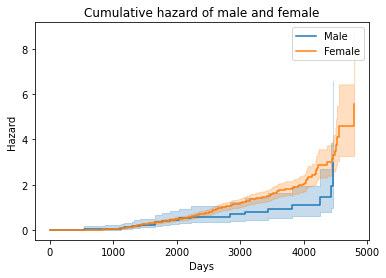

In [38]:
naf_male.plot_cumulative_hazard()
naf_female.plot_cumulative_hazard()

plt.title('Cumulative hazard of male and female')
plt.ylabel('Hazard')
plt.xlabel('Days')
plt.show()

## Log rank test
$H_0$: There is no difference between male and female in terms of death because of primary biliary cirrhosis.<br>
$H_A$: There is a significant difference between male and female in terms of death because of primary biliary cirrhosis.<br>
Level of significance: $\alpha = 0.05$

In [39]:
# Create a subset for each sex

time_male = male['Days']
dead_male = male['Status']

time_female = female['Days']
dead_female = female['Status']

## Perform the Log rank test

In [40]:
result_logrank = logrank_test(time_male, time_female, 
                              event_observed_A = dead_male, 
                              event_observed_B = dead_female)
result_logrank

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.47 0.12      3.10

We do not reject the $H_0$. There is no association between sex and survival from primary biliary cirrhosis.